In [69]:
import pandas as pd
import numpy as num_paths
import matplotlib.pyplot as psnrResault
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

In [70]:
df=pd.read_csv("dataTest.csv")

In [71]:
df=pd.DataFrame(df)
df.head()

,host,avgRTT,packetLoss,latency,hopCount,bandwidth,yukOrani,psnr,ssim_first,ssim_second,type,server
0,h1,1898.137,0.0,66,4,3000000,2011.425000,31.225948,0.985150,18.282783,3,h10
1,h2,2240.660,0.0,44,3,3000000,1859.161290,31.225948,0.985150,18.282674,3,h14
2,h3,2196.294,0.0,40,2,3000000,9084.620155,22.700112,0.956348,13.599976,3,h14
3,h4,1298.732,0.0,60,3,3000000,25815.963636,22.301604,0.960533,14.037636,3,h14
4,h5,338.105,0.0,92,4,3000000,37246.273632,22.510259,0.958593,13.829213,3,h10


In [72]:
df.dropna(inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,390.0,9.805737e+02,1.031326e+03,1.529400e+02,3.066162e+02,3.990735e+02,1.686185e+03,4.744949e+03
packetLoss,390.0,6.267806e-01,3.321362e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.333333e+01
latency,390.0,7.891538e+01,6.443686e+01,1.300000e+01,5.400000e+01,7.500000e+01,9.100000e+01,1.035000e+03
hopCount,390.0,3.107692e+00,1.040907e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
bandwidth,390.0,5.679487e+06,2.825215e+06,3.000000e+06,3.000000e+06,5.000000e+06,1.000000e+07,1.000000e+07
yukOrani,390.0,2.916015e+04,2.528603e+04,2.274049e+02,8.587295e+03,2.466657e+04,4.359985e+04,1.770201e+05
psnr,390.0,3.519972e+01,1.674665e+01,1.267172e+01,2.098130e+01,2.935489e+01,5.505260e+01,5.506194e+01
ssim_first,390.0,9.118329e-01,1.323608e-01,5.138590e-01,8.912813e-01,9.838145e-01,9.997650e-01,9.997650e-01
ssim_second,390.0,2.111762e+01,1.284589e+01,3.132379e+00,9.636969e+00,1.790873e+01,3.628266e+01,3.628266e+01
type,390.0,3.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00


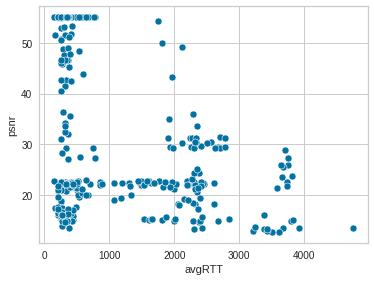

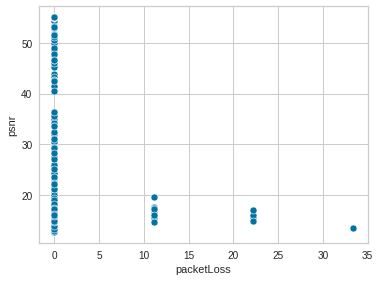

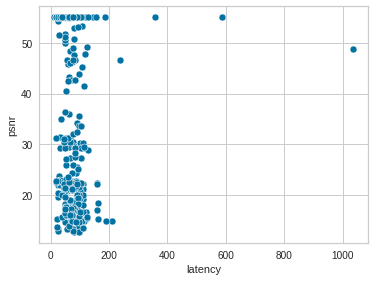

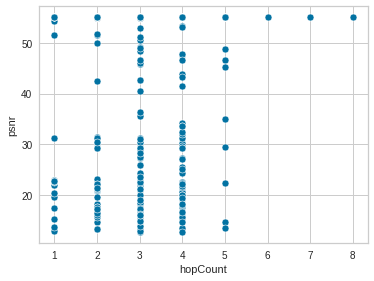

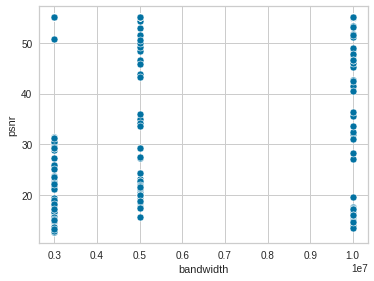

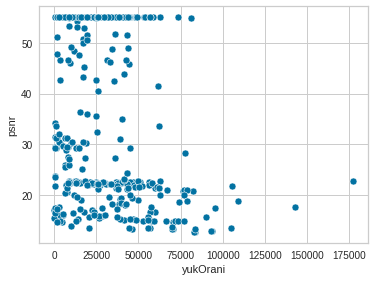

In [73]:
sayisal_veriler=["avgRTT","packetLoss","latency","hopCount","bandwidth","yukOrani"]
for i,deger in enumerate(sayisal_veriler):
    plt.figure(figsize=(20,20))
    ax=plt.subplot(4,3,i+1)
    sns.scatterplot(x=deger,y="psnr",data=df)
    plt.show()

In [74]:
# sns.displot(df)

In [75]:
y=df["ssim_first"]
x=df.drop(["host","ssim_first","ssim_second","type","psnr","server"],axis="columns")
y


0      0.985150
1      0.985150
2      0.956348
3      0.960533
4      0.958593
         ...   
387    0.712466
388    0.710734
389    0.719343
390    0.685168
391    0.707810
Name: ssim_first, Length: 390, dtype: float64

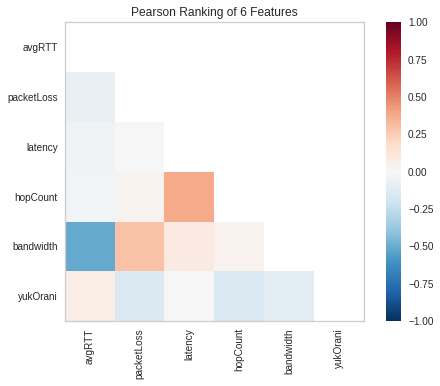

<AxesSubplot:title={'center':'Pearson Ranking of 6 Features'}>

In [76]:
from yellowbrick.features import Rank2D
visualizer=Rank2D(algorithm="pearson")
visualizer.fit(x,y)
visualizer.transform(x)
visualizer.show()

In [77]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,390.0,9.805737e+02,1.031326e+03,1.529400e+02,3.066162e+02,3.990735e+02,1.686185e+03,4.744949e+03
packetLoss,390.0,6.267806e-01,3.321362e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.333333e+01
latency,390.0,7.891538e+01,6.443686e+01,1.300000e+01,5.400000e+01,7.500000e+01,9.100000e+01,1.035000e+03
hopCount,390.0,3.107692e+00,1.040907e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
bandwidth,390.0,5.679487e+06,2.825215e+06,3.000000e+06,3.000000e+06,5.000000e+06,1.000000e+07,1.000000e+07
yukOrani,390.0,2.916015e+04,2.528603e+04,2.274049e+02,8.587295e+03,2.466657e+04,4.359985e+04,1.770201e+05


In [78]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest=train_test_split(x,y,test_size=0.5, random_state=42)

In [79]:
from sklearn.linear_model import LinearRegression
LogModel=LinearRegression()
LogModel.fit(XTrain,yTrain)
tahmin=LogModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

0.33598153110511453


In [80]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i,)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.30278429449444777 test: 0.20135944300263675
max_depth : 2 --> score r2 : eğitim:0.5742249430239534 test: 0.5353830778111566
max_depth : 3 --> score r2 : eğitim:0.6608180972602078 test: 0.596986967870437
max_depth : 4 --> score r2 : eğitim:0.7566273795851328 test: 0.6616865216095478
max_depth : 5 --> score r2 : eğitim:0.8133157431804933 test: 0.6742461624224727
max_depth : 6 --> score r2 : eğitim:0.8620346927570245 test: 0.6896116848452585
max_depth : 7 --> score r2 : eğitim:0.9010293303138593 test: 0.6831330748407076
max_depth : 8 --> score r2 : eğitim:0.9229001057979851 test: 0.6689544674819599
max_depth : 9 --> score r2 : eğitim:0.9418013034249431 test: 0.6628981856209525
max_depth : 10 --> score r2 : eğitim:0.945377008136531 test: 0.6591379483936306
max_depth : 11 --> score r2 : eğitim:0.9488608980431776 test: 0.661628477818694
max_depth : 12 --> score r2 : eğitim:0.9537686309103448 test: 0.671918406304679
max_depth : 13 --> score r2 : eğitim:0.

In [81]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: 0.06991186291494655
n_neigbors : 2 --> score r2 : eğitim:0.816372899307038 test: 0.43359519210708664
n_neigbors : 3 --> score r2 : eğitim:0.7506823982214057 test: 0.5751734692500629
n_neigbors : 4 --> score r2 : eğitim:0.709816199163898 test: 0.5442498158802231
n_neigbors : 5 --> score r2 : eğitim:0.6773437708315495 test: 0.5704335068773736
n_neigbors : 6 --> score r2 : eğitim:0.657440147683725 test: 0.5612958779040214
n_neigbors : 7 --> score r2 : eğitim:0.6400978667254056 test: 0.5713720338605136
n_neigbors : 8 --> score r2 : eğitim:0.6138484521420388 test: 0.5572090868067607
n_neigbors : 9 --> score r2 : eğitim:0.6172306095010229 test: 0.5633040092362054
n_neigbors : 10 --> score r2 : eğitim:0.6108041034637706 test: 0.5416293451570785
n_neigbors : 11 --> score r2 : eğitim:0.60851903959884 test: 0.5355844322987064
n_neigbors : 12 --> score r2 : eğitim:0.6075397282933772 test: 0.5344272234894154
n_neigbors : 13 --> score r2 : eğitim:0.600

In [82]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.21949711600233823 test: 0.04272608480584317


max_depth : 2 --> score r2 : eğitim:0.477837026944238 test: 0.4027238899038611
max_depth : 3 --> score r2 : eğitim:0.5607665380986808 test: 0.48386523959248007
max_depth : 4 --> score r2 : eğitim:0.7274082839996084 test: 0.5764027496618609
max_depth : 5 --> score r2 : eğitim:0.772416962306308 test: 0.6099198620427333
max_depth : 6 --> score r2 : eğitim:0.8305084269911769 test: 0.5974278703007114
max_depth : 7 --> score r2 : eğitim:0.884062999104158 test: 0.6360776909499006
max_depth : 8 --> score r2 : eğitim:0.9219440666444365 test: 0.6285260739309066
max_depth : 9 --> score r2 : eğitim:0.9343995513547069 test: 0.5924684084818244
max_depth : 10 --> score r2 : eğitim:0.9567218467680975 test: 0.5429289159035025
max_depth : 11 --> score r2 : eğitim:0.9945846937050683 test: 0.47838671430875446
max_depth : 12 --> score r2 : eğitim:0.9969475670001128 test: 0.42629562541787835
max_depth : 13 --> score r2 : eğitim:0.9982484156275072 test: 0.5011236408267923
max_depth : 14 --> score r2 : eğitim

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.5994924331413487 test: 0.43891961657673495
max_depth : 2 --> score r2 : eğitim:0.8668959700614527 test: 0.5739298632236111
max_depth : 3 --> score r2 : eğitim:0.9549220948452075 test: 0.5823290200732925
max_depth : 4 --> score r2 : eğitim:0.9893904137999898 test: 0.6021224783630181
max_depth : 5 --> score r2 : eğitim:0.9983291266642021 test: 0.6267703924431421
max_depth : 6 --> score r2 : eğitim:0.9996098251441012 test: 0.6451126032084642
max_depth : 7 --> score r2 : eğitim:0.9999553379664212 test: 0.6381603659092404
max_depth : 8 --> score r2 : eğitim:0.9999908333549467 test: 0.6376128435511332
max_depth : 9 --> score r2 : eğitim:0.9999993292469639 test: 0.6463374703941538


In [84]:
tahminGbr

array([0.95795567, 0.9405768 , 0.97245984, 0.94673966, 0.90317096,
       0.90822084, 0.94825307, 0.54039668, 0.97024607, 0.92945787,
       0.97298441, 1.00312719, 0.99634438, 0.9182715 , 0.55120508,
       0.54473633, 0.99820057, 0.95708513, 0.85598756, 0.97394804,
       0.98468262, 0.97987582, 0.70444091, 0.89125168, 0.98635816,
       0.88529483, 1.00157339, 0.97853751, 0.97918708, 1.00536228,
       0.70809731, 0.91162497, 0.9657342 , 0.96045739, 0.90534218,
       0.97581687, 0.99896471, 0.98485264, 1.00782855, 0.8783179 ,
       0.99441147, 0.99997253, 1.00262548, 0.99708456, 0.95563414,
       0.98331354, 0.96063277, 0.66633417, 1.00070736, 0.85263096,
       0.88763562, 0.70813967, 0.77167449, 0.96252221, 0.98443367,
       0.99151102, 1.00053835, 0.99901394, 0.97185142, 0.88461525,
       0.94072127, 0.99506753, 0.99973603, 0.96564623, 0.91275148,
       0.9828964 , 0.96373153, 0.58539032, 0.94265458, 0.96150123,
       0.71412298, 0.7085153 , 0.99781579, 0.95634629, 0.95532

In [85]:
yTest

9      0.953867
42     0.769184
33     0.961455
312    0.997327
273    0.916340
         ...   
251    0.620637
295    0.999765
184    0.999523
196    0.921715
276    0.956484
Name: ssim_first, Length: 195, dtype: float64

In [86]:
yTrain

204    0.891072
275    0.954504
130    0.982197
38     0.931159
11     0.955942
         ...   
71     0.999765
107    0.999756
271    0.534366
350    0.999765
103    0.999765
Name: ssim_first, Length: 195, dtype: float64

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
XTrain[sayisal_veriler]=scaler.fit_transform(XTrain[sayisal_veriler])
XTest[sayisal_veriler]=scaler.transform(XTest[sayisal_veriler])

In [88]:
from sklearn.linear_model import LinearRegression
LogModel=LinearRegression()
LogModel.fit(XTrain,yTrain)
tahmin=LogModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

0.33598153110765383


In [89]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: 0.3043546371458288
n_neigbors : 2 --> score r2 : eğitim:0.8459223057820711 test: 0.5404598343948677
n_neigbors : 3 --> score r2 : eğitim:0.7990491574606172 test: 0.5855306741695647
n_neigbors : 4 --> score r2 : eğitim:0.7506431857126953 test: 0.6291448499128232
n_neigbors : 5 --> score r2 : eğitim:0.7191770355779254 test: 0.5945122147041718
n_neigbors : 6 --> score r2 : eğitim:0.6979060576818654 test: 0.5827872024733132


n_neigbors : 7 --> score r2 : eğitim:0.685531454196181 test: 0.5837117385622357
n_neigbors : 8 --> score r2 : eğitim:0.6631839259318559 test: 0.5767864329769739
n_neigbors : 9 --> score r2 : eğitim:0.6520072438243298 test: 0.566744830054263
n_neigbors : 10 --> score r2 : eğitim:0.6232804729734664 test: 0.5670230648259194
n_neigbors : 11 --> score r2 : eğitim:0.6155644633024597 test: 0.5441266734770376
n_neigbors : 12 --> score r2 : eğitim:0.6082947635853693 test: 0.5372751467003821
n_neigbors : 13 --> score r2 : eğitim:0.5960309591888009 test: 0.5370666032946336
n_neigbors : 14 --> score r2 : eğitim:0.5935604784269116 test: 0.5289963621203443
n_neigbors : 15 --> score r2 : eğitim:0.5782039599751703 test: 0.5243566006532139
n_neigbors : 16 --> score r2 : eğitim:0.569136823668204 test: 0.517393819981186
n_neigbors : 17 --> score r2 : eğitim:0.5487807098487965 test: 0.49187388825233835
n_neigbors : 18 --> score r2 : eğitim:0.5273047230433594 test: 0.48326835656522094
n_neigbors : 19 --> s

In [90]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i,bootstrap=True,criterion="friedman_mse",max_features='log2',max_leaf_nodes=None,n_estimators=100,n_jobs=1,random_state=42)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.2782567584807346 test: 0.21945911666181306
max_depth : 2 --> score r2 : eğitim:0.48607969416587216 test: 0.40562759909802937
max_depth : 3 --> score r2 : eğitim:0.6243874299587779 test: 0.5122813985369064
max_depth : 4 --> score r2 : eğitim:0.7076898642179992 test: 0.5696341666022282
max_depth : 5 --> score r2 : eğitim:0.7828236228286695 test: 0.6006008738964075
max_depth : 6 --> score r2 : eğitim:0.8376836044716722 test: 0.6216307061138195
max_depth : 7 --> score r2 : eğitim:0.8772465037510631 test: 0.632806459438183
max_depth : 8 --> score r2 : eğitim:0.9089726218336691 test: 0.6381665367868085
max_depth : 9 --> score r2 : eğitim:0.9284592591719358 test: 0.6362191082351211
max_depth : 10 --> score r2 : eğitim:0.937104807249329 test: 0.6279054717583121
max_depth : 11 --> score r2 : eğitim:0.9476636484440881 test: 0.6353558682130632
max_depth : 12 --> score r2 : eğitim:0.9493631091981185 test: 0.6365794966680642
max_depth : 13 --> score r2 : eğitim

In [91]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.21949711600233823 test: 0.04272608480584317
max_depth : 2 --> score r2 : eğitim:0.47783702694423813 test: 0.402723889903861
max_depth : 3 --> score r2 : eğitim:0.5607665380986808 test: 0.483921909896705
max_depth : 4 --> score r2 : eğitim:0.7274082839996086 test: 0.5772715867078204
max_depth : 5 --> score r2 : eğitim:0.772416962306308 test: 0.6100489992640249
max_depth : 6 --> score r2 : eğitim:0.8305084269911769 test: 0.5882784989092587
max_depth : 7 --> score r2 : eğitim:0.884062999104158 test: 0.6167931506087787
max_depth : 8 --> score r2 : eğitim:0.9219440666444365 test: 0.5921212863287391
max_depth : 9 --> score r2 : eğitim:0.9343995513547069 test: 0.5934089729905285
max_depth : 10 --> score r2 : eğitim:0.9567218467680975 test: 0.574713404148778
max_depth : 11 --> score r2 : eğitim:0.9945846937050683 test: 0.44693222860792126
max_depth : 12 --> score r2 : eğitim:0.9969475670001128 test: 0.45375364534885687
max_depth : 13 --> score r2 : eğitim:

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.5994924331413487 test: 0.43891961657673506
max_depth : 2 --> score r2 : eğitim:0.8668959700614527 test: 0.5757536391550129
max_depth : 3 --> score r2 : eğitim:0.9549220948452075 test: 0.5792385752645112
max_depth : 4 --> score r2 : eğitim:0.9893904137999898 test: 0.597593856588938
max_depth : 5 --> score r2 : eğitim:0.9983291266642021 test: 0.6222423233436416
max_depth : 6 --> score r2 : eğitim:0.9996098251441013 test: 0.6480699226907558
max_depth : 7 --> score r2 : eğitim:0.9999553379664212 test: 0.6362704176053429
max_depth : 8 --> score r2 : eğitim:0.9999908333549467 test: 0.6354707276539686
max_depth : 9 --> score r2 : eğitim:0.9999993292469639 test: 0.6337064966757117
